<span style="font-size: 100px;">K-nearest neighbors</span>

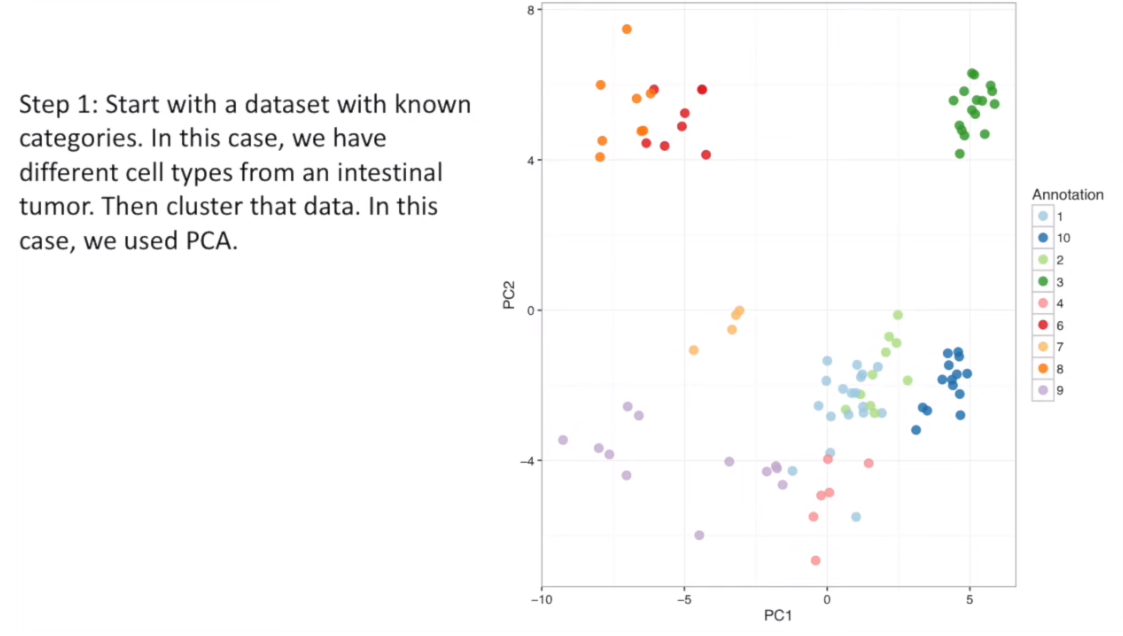

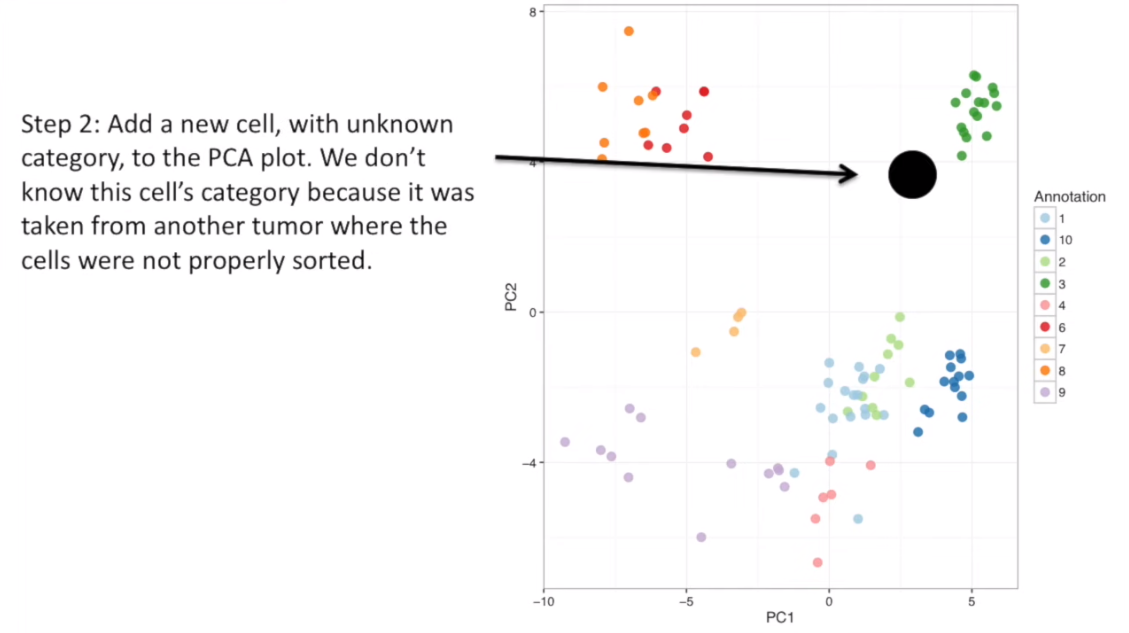

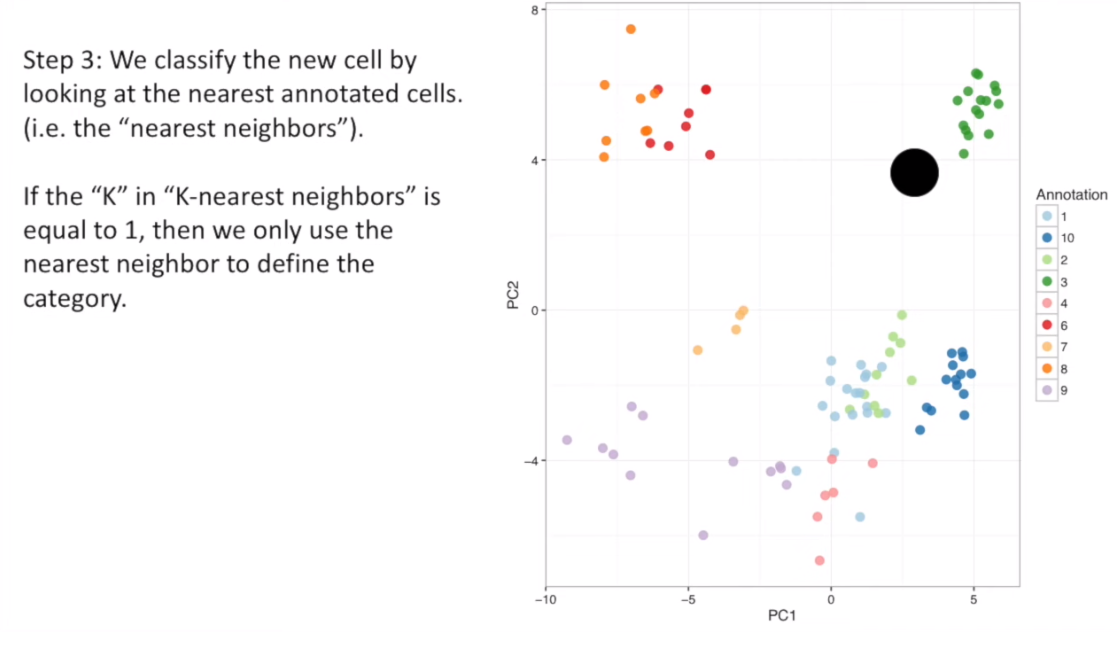

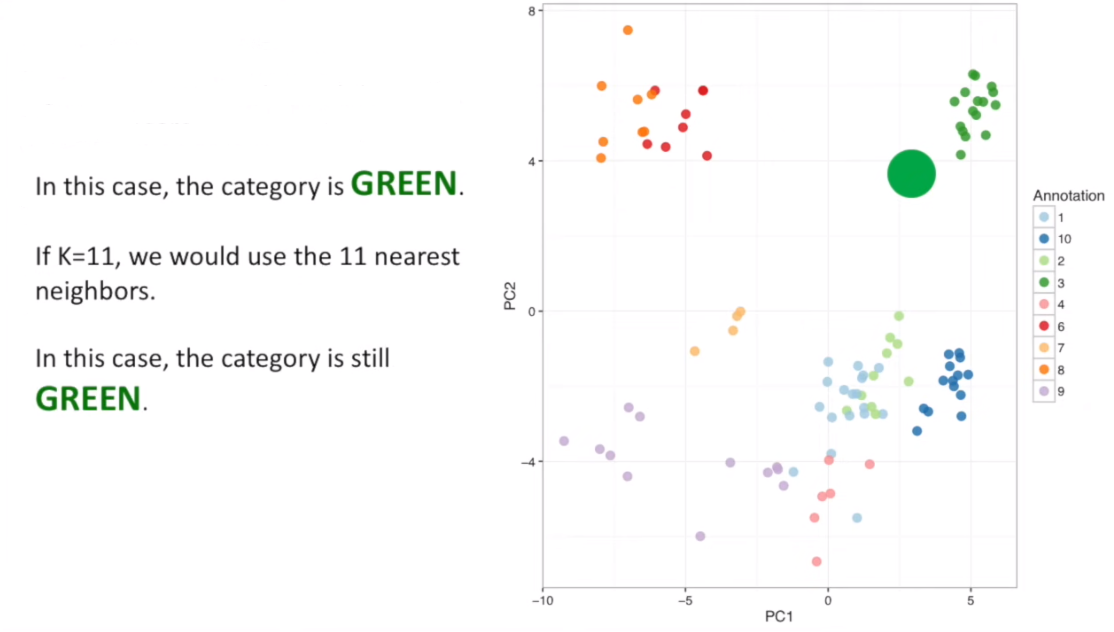

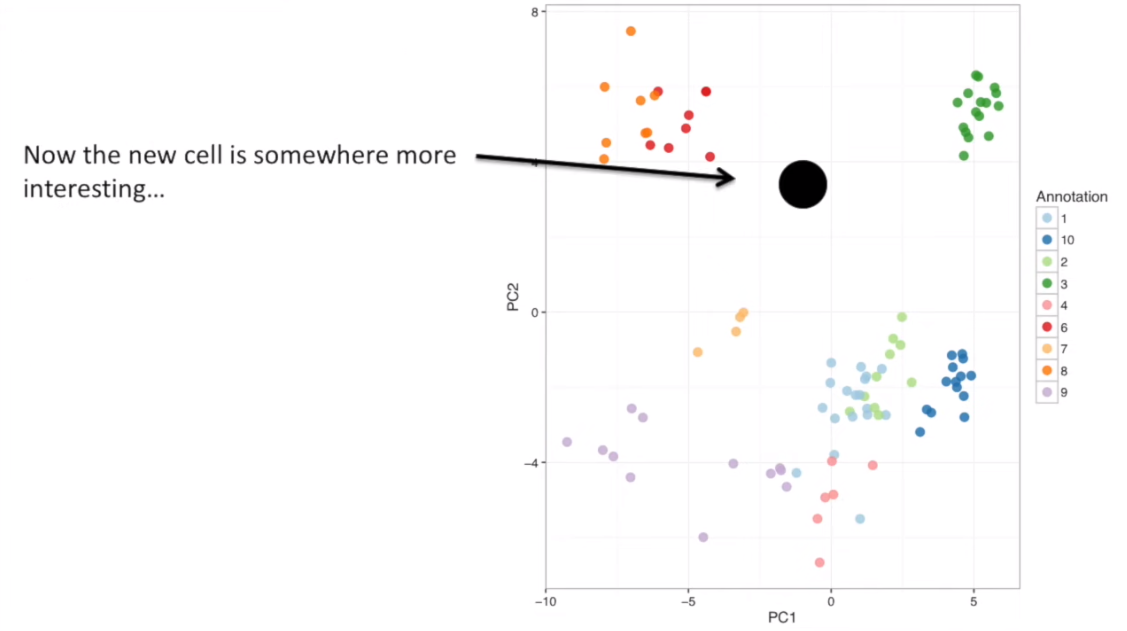

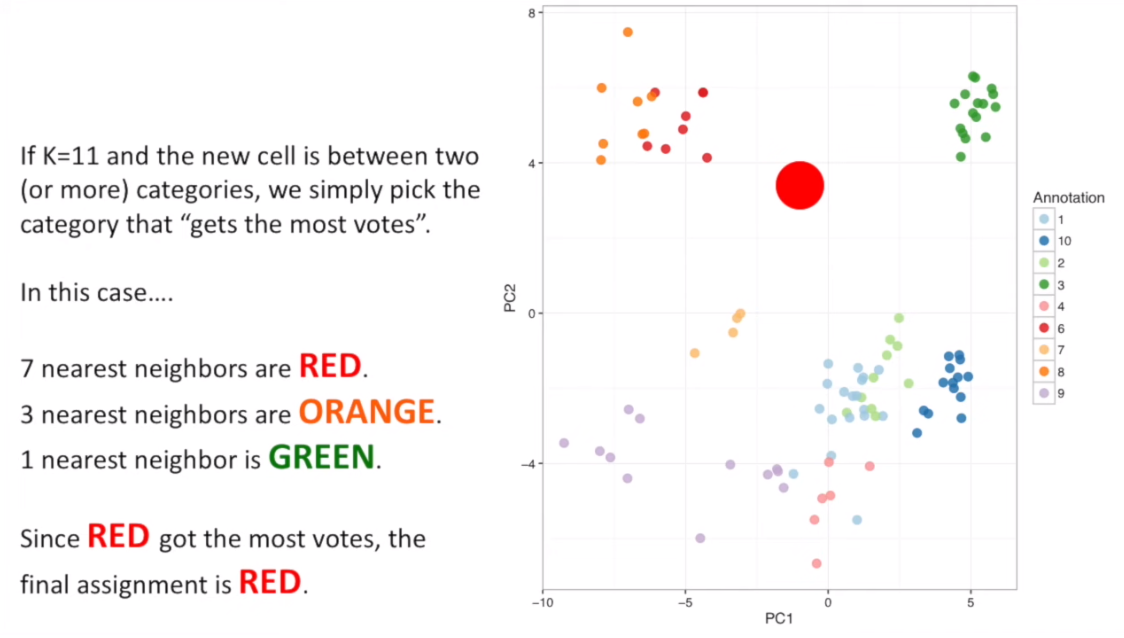

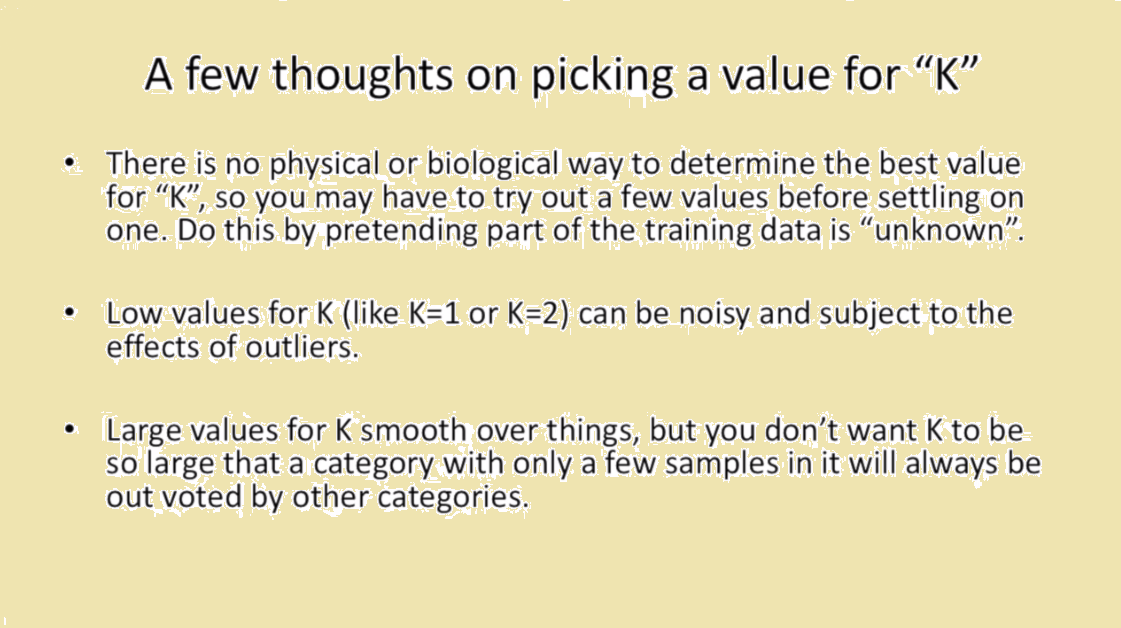

The KNN algorithm can be used for both classification and regression problems. In regression tries to predict the value and in classification attempts to predict the class.  

<div id="myElement" style="font-size: 200px; background-color: #ffff00;">
  Example
</div>

<script>
  const element = document.getElementById('myElement');
  const fontSize = window.getComputedStyle(element).fontSize;
  const backgroundColor = window.getComputedStyle(element).backgroundColor;

  console.log('Font Size:', fontSize);
  console.log('Background Color:', backgroundColor);
</script>


<span style="font-size: 70px;">**California housing dataset**</span>

It consists of nine attributes:

* **MedInc** - median income in block group<sup>*</sup>
* **HouseAge** - median house age in a block group
* **AveRooms** - the average number of rooms (provided per household)
* **AveBedrms** - the average number of bedrooms (provided per household)
* **Population** - block group population
* **AveOccup** - the average number of household members
* **Latitude** - block group latitude
* **Longitude** - block group longitude
* **MedHouseVal** - median house value for California districts (hundreds of thousands of dollars)

<sup>*</sup>A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data. Besides block group, another term used is household, a household is a group of people residing within a home.

In [28]:
from sklearn.datasets import fetch_california_housing
# as_frame=True loads the data in a dataframe format, with other metadata besides it
california_housing = fetch_california_housing(as_frame=True)
# Select only the dataframe part and assign it to the df variable
df = california_housing.frame

In [29]:
import pandas as pd
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


The preprocessing is where the first differences between the regression and classification tasks appear. Since this section is all about regression, we'll prepare our dataset accordingly.

For the regression, we need to predict another median house value. To do so, we will assign MedHouseVal to y and all other columns to X just by dropping MedHouseVal:

In [30]:
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis = 1)

By looking at our variables’ descriptions, we can see that we have differences in measurements. To avoid guessing, let's use the describe() method to check:

In [31]:
# .T transposes the results, transforming rows into columns
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


Here, we can see that the mean value of MedInc is approximately 3.87 and the mean value of HouseAge is about 28.64, making it 7.4 times larger than MedInc. Other features also have differences in mean and standard deviation - to see that, look at the mean and std values and observe how they are distant from each other. For MedInc std is approximately 1.9, for HouseAge, std is 12.59 and the same applies to the other features.

We're using an algorithm based on distance and distance-based algorithms suffer greatly from data that isn't on the same scale, such as this data. The scale of the points may (and in practice, almost always does) distort the real distance between values.

To perform Feature Scaling, we will use Scikit-Learn's StandardScaler class later. If we apply the scaling right now (before a train-test split), the calculation would include test data, effectively leaking test data information into the rest of the pipeline. This sort of data leakage is unfortunately commonly skipped, resulting in irreproducible or illusory findings.

**Splitting Data into Train and Test Sets**

In [32]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

By using 75% of the data for training and 25% for testing, Let's inspect those numbers quickly by printing the lengths of the full dataset and of split data:

In [33]:
print(len(X) ) 
print(len(X_train))
print(len(X_test))

20640
15480
5160


We can now fit the data scaler on the X_train set, and scale both X_train and X_test without leaking any data from X_test into X_train.

**Feature Scaling for KNN Regression**

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df = pd.DataFrame(X_train, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,15480.0,2.074711e-16,1.000032,-1.774632,-0.688854,-0.175663,0.464450,5.842113
HouseAge,15480.0,-1.232434e-16,1.000032,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,15480.0,-1.620294e-16,1.000032,-1.877586,-0.407008,-0.083940,0.257082,56.357392
AveBedrms,15480.0,7.435912e-17,1.000032,-1.740123,-0.205765,-0.108332,0.007435,55.925392
Population,15480.0,-8.996536e-17,1.000032,-1.246395,-0.558886,-0.227928,0.262056,29.971725
AveOccup,15480.0,1.055716e-17,1.000032,-0.201946,-0.056581,-0.024172,0.014501,103.737365
Latitude,15480.0,7.890329e-16,1.000032,-1.451215,-0.799820,-0.645172,0.971601,2.953905
Longitude,15480.0,2.206676e-15,1.000032,-2.380303,-1.106817,0.536231,0.785934,2.633738


Observe how all standard deviations are now 1 and the means have become smaller. This is what makes our data more uniform! Let's train and evaluate a KNN-based regressor.

**Training and Predicting KNN Regression**

In [36]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In the above code, the n_neighbors is the value for K, or the number of neighbors the algorithm will take into consideration for choosing a new median house value. 5 is the default value for KNeighborsRegressor(). There is no ideal value for K and it is selected after testing and evaluation, however, to start out, 5 is a commonly used value for KNN and was thus set as the default value.

The final step is to make predictions on our test data. To do so, execute the following script:

In [37]:
y_pred = regressor.predict(X_test)

The mean_absolute_error() and mean_squared_error() methods of sklearn.metrics can be used to calculate these metrics as can be seen in the following snippet:

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

# The R2 can be calculated directly with the score() method:
print("R squared:",regressor.score(X_test, y_test))

mae: 0.4460739527131783
mse: 0.4316907430948294
rmse: 0.6570317671884894
R squared: 0.6737569252627673


**Finding the Best K for KNN Regression**
Ideally, you would see which metric fits more into your context - but it is usually interesting to test all metrics. Whenever you can test all of them, do it. Here, we will show how to choose the best K using only the mean absolute error, but you can change it to any other metric and compare the results.

To do this, we will create a for loop and run models that have from 1 to X neighbors. At each interaction, we will calculate the MAE and plot the number of Ks along with the MAE result:

In [39]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

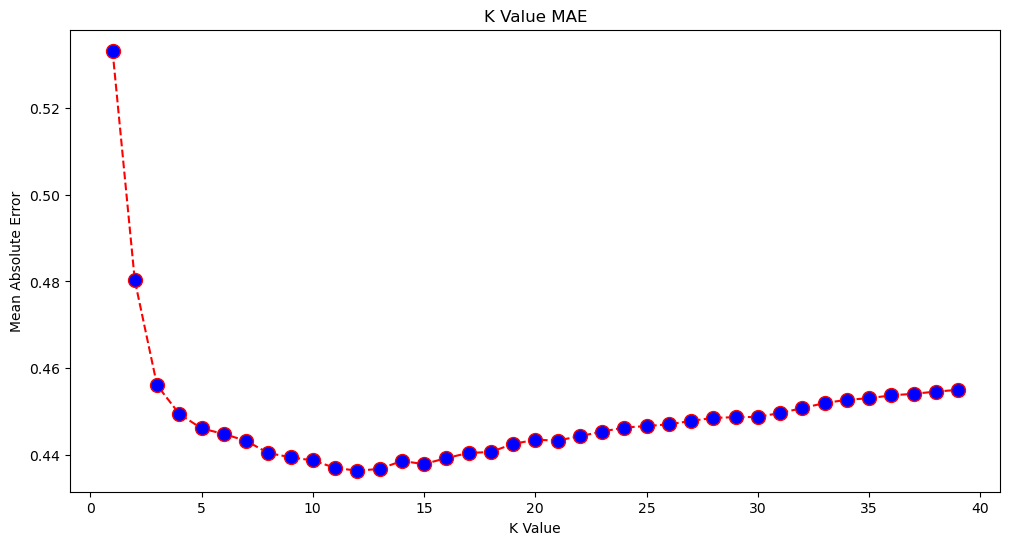

In [40]:
# Now, let's plot the errors:

import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')


Looking at the plot, it seems the lowest MAE value is when K is 12. Let's get a closer look at the plot to be sure by plotting less data:

Text(0, 0.5, 'Mean Absolute Error')

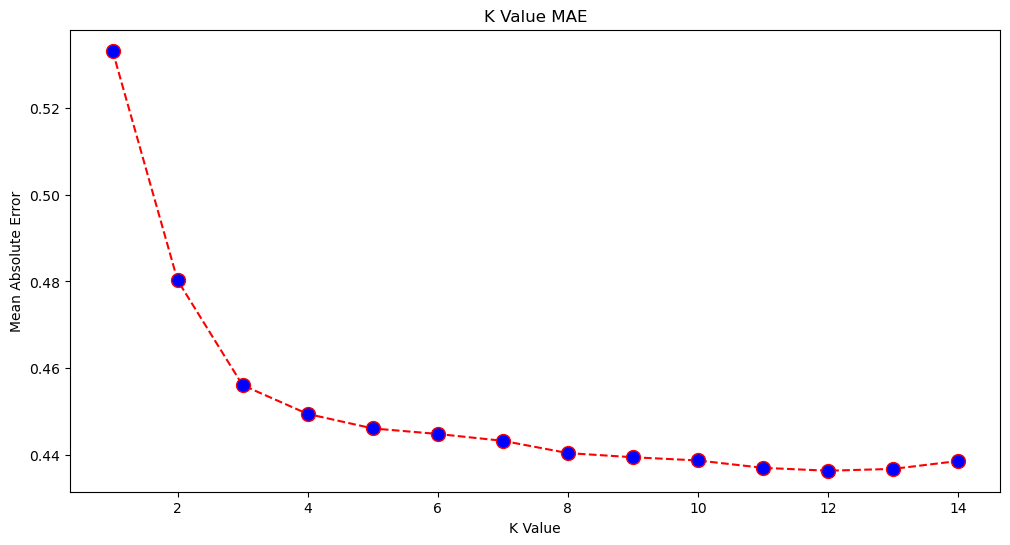

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

You can also obtain the lowest error and the index of that point using the built-in min() function (works on lists) or convert the list into a NumPy array and get the argmin() (index of the element with the lowest value):

In [42]:
import numpy as np 

print(min(error))               
print(np.array(error).argmin()) 

0.43631325936692505
11


We started counting neighbors on 1, while arrays are 0-based, so the 11th index is 12 neighbors!

This means that we need 12 neighbors to be able to predict a point with the lowest MAE error. We can execute the model and metrics again with 12 neighbors to compare results:

In [43]:
knn_reg12 = KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.6887495617137436, 
mae: 0.43631325936692505 
mse: 0.4118522151025172 
rmse: 0.6417571309323467


With 12 neighbors our KNN model now explains 69% of the variance in the data, and has lost a little less, going from 0.44 to 0.43, 0.43 to 0.41, and 0.65 to 0.64 with the respective metrics. It is not a very large improvement, but it is an improvement nonetheless.

<h1>Classification using K-Nearest Neighbors with Scikit-Learn<h1>

In this task, instead of predicting a continuous value, we want to predict the class to which these block groups belong. To do that, we can divide the median house value for districts into groups with different house value ranges or bins.

When you want to use a continuous value for classification, you can usually bin the data. In this way, you can predict groups, instead of values.

**Preprocessing Data for Classification**

Let's create the data bins to transform our continuous values into categories:

In [44]:
# Creating 4 categories and assigning them to a MedHouseValCat column
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

Then, we can split our dataset into its attributes and labels:

In [45]:
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)

Since we have used the MedHouseVal column to create bins, we need to drop the MedHouseVal column and MedHouseValCat columns from X. This way, the DataFrame will contain the first 8 columns of the dataset (i.e. attributes, features) while our y will contain only the MedHouseValCat assigned label.

**Splitting Data into Train and Test Sets**


In [46]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

**Feature Scaling for Classification**

Since we are dealing with the same unprocessed dataset and its varying measure units, we will perform feature scaling again, in the same way as we did for our regression data:

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Training and Predicting for Classification**

After binning, splitting, and scaling the data, we can finally fit a classifier on it. For the prediction, we will use 5 neighbors again as a baseline. You can also instantiate the KNeighbors_ class without any arguments and it will automatically use 5 neighbors. Here, instead of importing the KNeighborsRegressor, we will import the KNeighborsClassifier, class:

In [48]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

After fitting the KNeighborsClassifier, we can predict the classes of the test data:

In [49]:
y_pred = classifier.predict(X_test)

Let's score our classifier:

In [50]:
acc =  classifier.score(X_test, y_test)
print(acc) 

0.6191860465116279


By looking at the resulting score, we can deduce that our classifier got ~62% of our classes right. This already helps in the analysis, although by only knowing what the classifier got right, it is difficult to improve it.

The confusion_matrix() and classification_report() methods of the sklearn.metrics module can be used to calculate and display all these metrics. The confusion_matrix is better visualized using a heatmap. The classification report already gives us accuracy, precision, recall, and f1-score, but you could also import each of these metrics from sklearn.metrics.

To obtain metrics, execute the following snippet:

              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



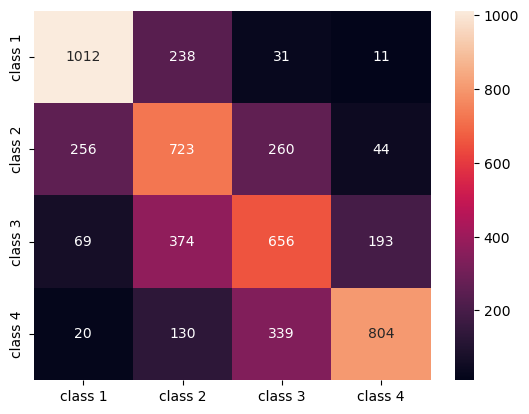

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

The results show that KNN was able to classify all the 5160 records in the test set with 62% accuracy, which is above average. The supports are fairly equal (even distribution of classes in the dataset), so the weighted F1 and unweighted F1 are going to be roughly the same.

We can also see the result of the metrics for each of the 4 classes. From that, we are able to notice that class 2 had the lowest precision, lowest recall, and lowest f1-score. Class 3 is right behind class 2 for having the lowest scores, and then, we have class 1 with the best scores followed by class 4.

By looking at the confusion matrix, we can see that:

class 1 was mostly mistaken for class 2 in 238 cases
class 2 for class 1 in 256 entries, and for class 3 in 260 cases
class 3 was mostly mistaken by class 2, 374 entries, and class 4, in 193 cases
class 4 was wrongly classified as class 3 for 339 entries, and as class 2 in 130 cases.
Also, notice that the diagonal displays the true positive values, when looking at it, it is plain to see that class 2 and class 3 have the least correctly predicted values.

With those results, we could go deeper into the analysis by further inspecting them to figure out why that happened, and also understanding if 4 classes are the best way to bin the data. Perhaps values from class 2 and class 3 were too close to each other, so it became hard to tell them apart.

Besides the arbitrary number of data bins, there is also another arbitrary number that we have chosen, the number of K neighbors. The same technique we applied to the regression task can be applied to the classification when determining the number of Ks that maximize or minimize a metric value.

**Finding the Best K for KNN Classification**

Let's repeat what has been done for regression and plot the graph of K values and the corresponding metric for the test set. You can also choose which metric better fits your context, here, we will choose f1-score.

In this way, we will plot the f1-score for the predicted values of the test set for all the K values between 1 and 40.

First, we import the f1_score from sklearn.metrics and then calculate its value for all the predictions of a K-Nearest Neighbors classifier, where K ranges from 1 to 40:

In [53]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

The next step is to plot the f1_score values against K values. The difference from the regression is that instead of choosing the K value that minimizes the error, this time we will choose the value that maximizes the f1-score.

Execute the following script to create the plot:

Text(0, 0.5, 'F1 Score')

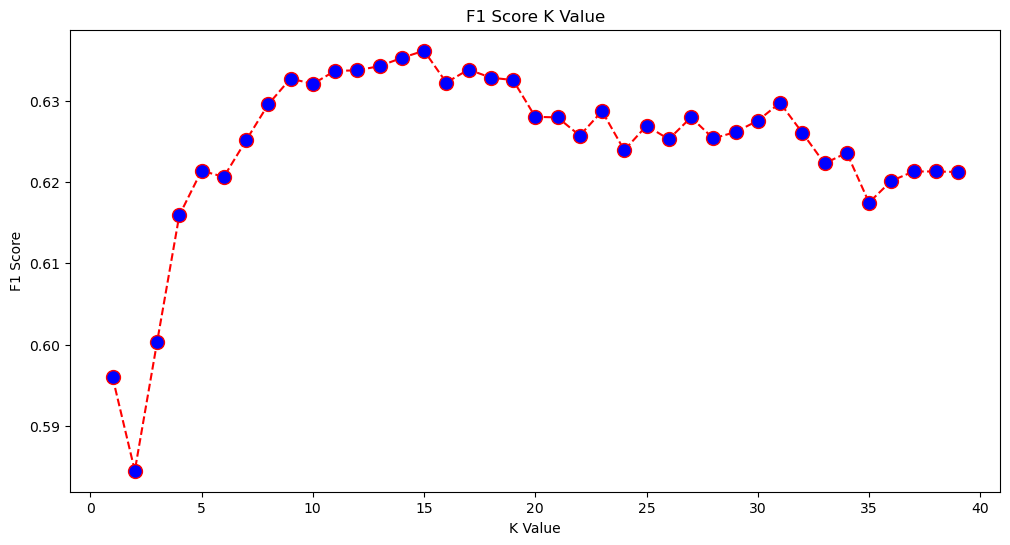

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

From the output, we can see that the f1-score is the highest when the value of the K is 15. Let's retrain our classifier with 15 neighbors and see what it does to our classification report results:

In [55]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160



Notice that our metrics have improved with 15 neighbors, we have 63% accuracy and higher precision, recall, and f1-scores, but we still need to further look at the bins to try to understand why the f1-score for classes 2 and 3 is still low.

Besides using KNN for regression and determining block values and for classification, to determine block classes - we can also use KNN for detecting which mean blocks values are different from most - the ones that don't follow what most of the data is doing. In other words, we can use KNN for detecting outliers.

**Implementing KNN for Outlier Detection with Scikit-Learn**

Outlier detection uses another method that differs from what we had done previously for regression and classification.

Here, we will see how far each of the neighbors is from a data point. Let's use the default 5 neighbors. For a data point, we will calculate the distance to each of the K-nearest neighbors. To do that, we will import another KNN algorithm from Scikit-learn which is not specific for either regression or classification called simply NearestNeighbors.

After importing, we will instantiate a NearestNeighbors class with 5 neighbors - you can also instantiate it with 12 neighbors to identify outliers in our regression example or with 15, to do the same for the classification example. We will then fit our train data and use the kneighbors() method to find our calculated distances for each data point and neighbors indexes:

In [56]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

Now we have 5 distances for each data point - the distance between itself and its 5 neighbors, and an index that identifies them. Let's take a peek at the first three results and the shape of the array to visualize this better.

To look at the first three distances shape, execute:

In [57]:
distances[:3], distances.shape

(array([[0.        , 0.12998939, 0.15157687, 0.16543705, 0.17750354],
        [0.        , 0.25535314, 0.37100754, 0.39090243, 0.40619693],
        [0.        , 0.27149697, 0.28024623, 0.28112326, 0.30420656]]),
 (15480, 5))

Observe that there are 3 rows with 5 distances each. We can also look and the neighbors' indexes:

In [58]:
indexes[:3], indexes[:3].shape

(array([[    0,  8608, 12831,  8298,  2482],
        [    1,  4966,  5786,  8568,  6759],
        [    2, 13326, 13936,  3618,  9756]]),
 (3, 5))

In the output above, we can see the indexes of each of the 5 neighbors. Now, we can continue to calculate the mean of the 5 distances and plot a graph that counts each row on the X-axis and displays each mean distance on the Y-axis:

Text(0, 0.5, 'Mean Distances')

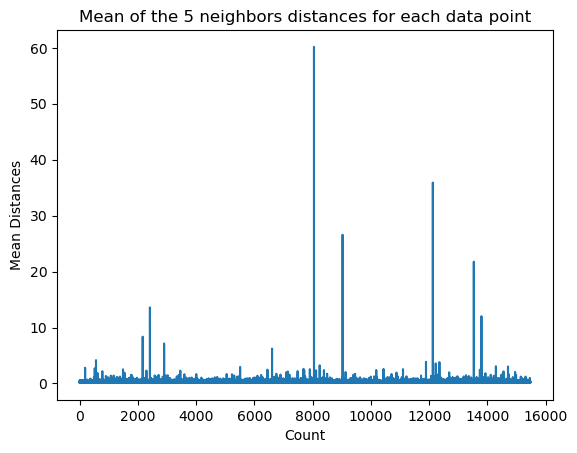

In [59]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

Notice that there is a part of the graph in which the mean distances have uniform values. That Y-axis point in which the means aren't too high or too low is exactly the point we need to identify to cut off the outlier values.

In this case, it is where the mean distance is 3. Let's plot the graph again with a horizontal dotted line to be able to spot it:

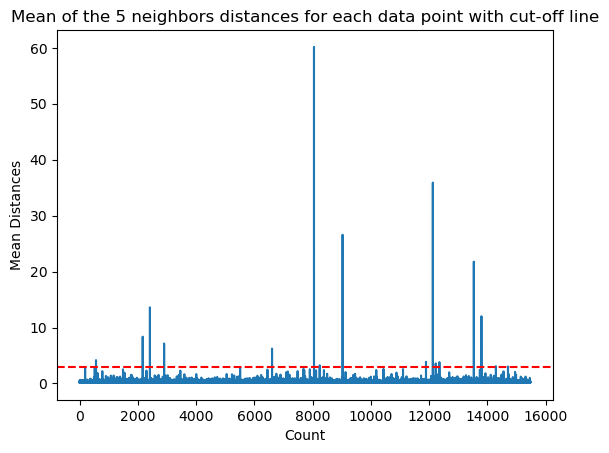

In [60]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')

This line marks the mean distance for which above it all values vary. This means that all points with a mean distance above 3 are our outliers. We can find out the indexes of those points using np.where(). This method will output either True or False for each index in regards to the mean above 3 condition:

In [61]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 3)
outlier_index

(array([  564,  2167,  2415,  2902,  6607,  8047,  8243,  9029, 11892,
        12127, 12226, 12353, 13534, 13795, 14292, 14707]),)

Now we have our outlier point indexes. Let's locate them in the dataframe:

In [62]:
# Filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
564,4.8711,27.0,5.082811,0.944793,1499.0,1.880803,37.75,-122.24,2.86600,4
2167,2.8359,30.0,4.948357,1.001565,1660.0,2.597809,36.78,-119.83,0.80300,1
2415,2.8250,32.0,4.784232,0.979253,761.0,3.157676,36.59,-119.44,0.67600,1
2902,1.1875,48.0,5.492063,1.460317,129.0,2.047619,35.38,-119.02,0.63800,1
6607,3.5164,47.0,5.970639,1.074266,1700.0,2.936097,34.18,-118.14,2.26500,3
8047,2.7260,29.0,3.707547,1.078616,2515.0,1.977201,33.84,-118.17,2.08700,3
8243,2.0769,17.0,3.941667,1.211111,1300.0,3.611111,33.78,-118.18,1.00000,1
9029,6.8300,28.0,6.748744,1.080402,487.0,2.447236,34.05,-118.78,5.00001,4
11892,2.6071,45.0,4.225806,0.903226,89.0,2.870968,33.99,-117.35,1.12500,1
12127,4.1482,7.0,5.674957,1.106998,5595.0,3.235975,33.92,-117.25,1.24600,2


Our outlier detection is finished. This is how we spot each data point that deviates from the general data trend. We can see that there are 16 points in our train data that should be further looked at, investigated, maybe treated, or even removed from our data (if they were erroneously input) to improve results. Those points might have resulted from typing errors, mean block values inconsistencies, or even both.

**Pros and Cons of KNN**

In this section, we'll present some of the pros and cons of using the KNN algorithm.

**Pros**

* It is easy to implement
* It is a lazy learning algorithm and therefore doesn't require training on all data points (only using the K-Nearest neighbors to predict). This makes the KNN algorithm much faster than other algorithms that require training with the whole dataset such as Support Vector Machines, linear regression, etc.
* Since KNN requires no training before making predictions, new data can be added seamlessly
* There are only two parameters required to work with KNN, i.e. the value of K and the distance function

**Cons**

* The KNN algorithm doesn't work well with high dimensional data because with a large number of dimensions, the distance between points gets "weird", and the distance metrics we use don't hold up
* Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features

**Conclusion**

KNN is a simple yet powerful algorithm. It can be used for many tasks such as regression, classification, or outlier detection.

KNN has been widely used to find document similarity and pattern recognition. It has also been employed for developing recommender systems and for dimensionality reduction and pre-processing steps for computer vision - particularly face recognition tasks.

In this guide - we've gone through regression, classification and outlier detection using Scikit-Learn's implementation of the K-Nearest Neighbor algorithm.

<span style="font-size: 200px;">The End</span>